In [2]:
# давай тут проанализируем данные по пассажирам Титаника

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt



# загружаем данные из интернета
url = 'https://raw.githubusercontent.com/plotly/datasets/master/titanic.csv'

# загружаем данные в DataFrame
titanic = pd.read_csv(url)

# выводим первые 5 строк
print(titanic.head())


   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  


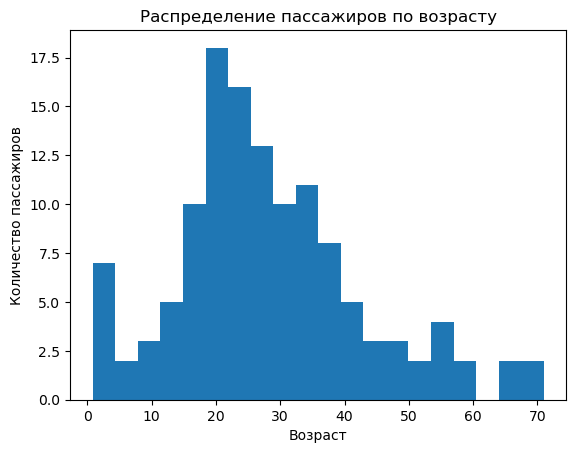

In [3]:
# давай построим график расспределение пассажиров по возрасту

plt.hist(titanic['Age'].dropna(), bins=20)
plt.title('Распределение пассажиров по возрасту')
plt.xlabel('Возраст')
plt.ylabel('Количество пассажиров')
plt.show()

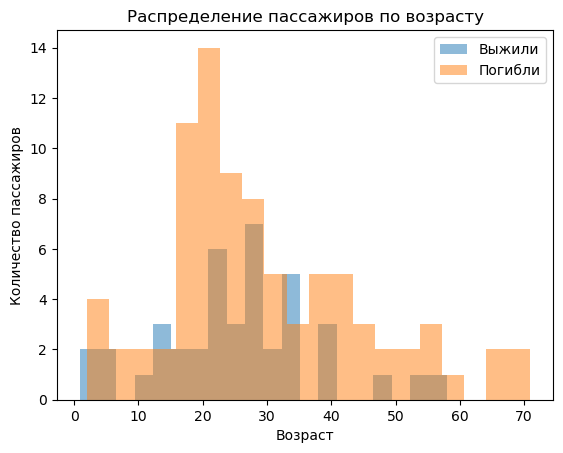

In [5]:
# надо построить график зависимости выживаемости от возраста

plt.hist(titanic[titanic['Survived'] == 1]['Age'].dropna(), bins=20, alpha=0.5, label='Выжили')
plt.hist(titanic[titanic['Survived'] == 0]['Age'].dropna(), bins=20, alpha=0.5, label='Погибли')
plt.title('Распределение пассажиров по возрасту')
plt.xlabel('Возраст')
plt.ylabel('Количество пассажиров')
plt.legend()
plt.show()


C:\Users\aliak\AppData\Local\Temp\ipykernel_17764\2005752256.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_survived = titanic.groupby(pd.cut(titanic['Age'], np.arange(0, 100, 10)))['Survived']


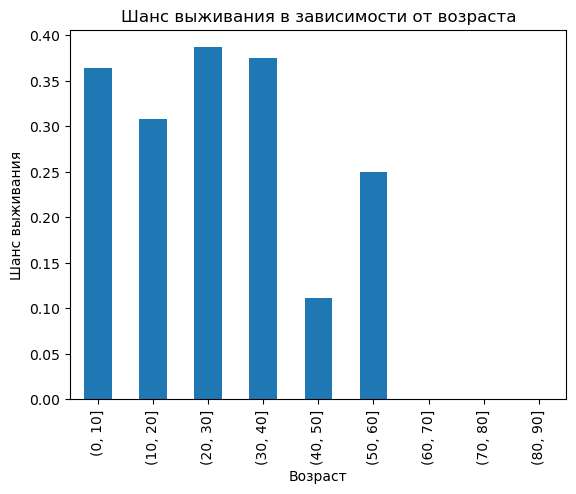

In [20]:
# а теперь это надо нормализировать как шанс выживания.
# для этого надо сгруппировать данные по возрасту в ячейки по 10 лет
age_survived = titanic.groupby(pd.cut(titanic['Age'], np.arange(0, 100, 10)))['Survived']

age_survived = age_survived.sum() / age_survived.count()

age_survived.plot(kind='bar')
plt.title('Шанс выживания в зависимости от возраста')
plt.xlabel('Возраст')
plt.ylabel('Шанс выживания')
plt.show()


In [10]:
# сколько у меня данных вобще и что они из себя представляют?
print(titanic.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  156 non-null    int64  
 1   Survived     156 non-null    int64  
 2   Pclass       156 non-null    int64  
 3   Name         156 non-null    object 
 4   Sex          156 non-null    object 
 5   Age          126 non-null    float64
 6   SibSp        156 non-null    int64  
 7   Parch        156 non-null    int64  
 8   Ticket       156 non-null    object 
 9   Fare         156 non-null    float64
 10  Cabin        31 non-null     object 
 11  Embarked     155 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 14.8+ KB
None
